In [1]:
# import libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense

In [2]:
# initialising the CNN
classifier = Sequential()

# step 1 - convolution
classifier.add(Convolution2D(32, 3, 3, input_shape=(64, 64, 3), activation='relu'))
# step 2 - pooling
classifier.add(MaxPooling2D(pool_size=(2,2)))
# step 3 - flattening
classifier.add(Flatten())
# step 4 - full connection
classifier.add(Dense(128, activation='relu'))
classifier.add(Dense(1, activation='sigmoid'))

# compiling the CNN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [3]:
# data augmentation
## creating more data from existing dataset

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, 
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

training_set = train_datagen.flow_from_directory('data/training_set',
                                                target_size=(64, 64),
                                                batch_size=32,
                                                class_mode='binary')

test_set = test_datagen.flow_from_directory('data/test_set',
                                           target_size=(64, 64),
                                           batch_size=32,
                                           class_mode='binary')

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [4]:
# training
history = classifier.fit(training_set,
                         steps_per_epoch=50,
                         epochs=10,
                         validation_data=test_set)

Epoch 1/10
50/50 [==============================] - 81s 2s/step - loss: 0.6866 - accuracy: 0.5569 - val_loss: 0.6591 - val_accuracy: 0.6275
Epoch 2/10
50/50 [==============================] - 33s 666ms/step - loss: 0.6585 - accuracy: 0.6037 - val_loss: 0.6321 - val_accuracy: 0.6505
Epoch 3/10
50/50 [==============================] - 30s 607ms/step - loss: 0.6361 - accuracy: 0.6344 - val_loss: 0.6631 - val_accuracy: 0.5970
Epoch 4/10
50/50 [==============================] - 26s 522ms/step - loss: 0.6471 - accuracy: 0.6331 - val_loss: 0.6132 - val_accuracy: 0.6780
Epoch 5/10
50/50 [==============================] - 23s 454ms/step - loss: 0.6257 - accuracy: 0.6625 - val_loss: 0.6081 - val_accuracy: 0.6685
Epoch 6/10
50/50 [==============================] - 30s 591ms/step - loss: 0.6099 - accuracy: 0.6737 - val_loss: 0.6308 - val_accuracy: 0.6370
Epoch 7/10
50/50 [==============================] - 13s 253ms/step - loss: 0.6023 - accuracy: 0.6719 - val_loss: 0.5796 - val_accuracy: 0.7125
Ep

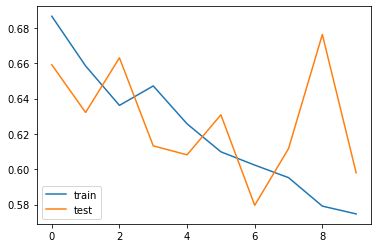

In [5]:
# check with graph on loss during training
import matplotlib.pyplot as plt

# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [8]:
# testing
import numpy as np
from tensorflow.keras.preprocessing import image

# loading an image from the disk
test_image = image.load_img('random_dog.png', target_size=(64, 64))

# converting the image to a numpy array
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
print(training_set.class_indices)

# our cut-off
if result[0][0] >= 0.5:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)

{'cats': 0, 'dogs': 1}
dog


In [7]:
print(training_set.class_indices)

{'cats': 0, 'dogs': 1}
